### R

In [ ]:
library(ape)

# 1. читает из текста дерево (((A,B),(C,D)),E); в объект simpletree

simpletree <- read.tree(text = "(((A,B), (C,D)), E);") 

# 2. рисует simpletree с помощью стандартной функции из пакета ape

plot.phylo(simpletree) 

# 3. сохраняет это дерево в растровый формат (png) 

png("simpletree.png") 
plot.phylo(simpletree)
dev.off()

# 3. и векторный (svg или pdf)

svg("simpletree.svg", width = 4, height = 4) 
plot.phylo(simpletree)
dev.off()

# 4. читает файл https://www.jasondavies.com/tree-of-life/life.txt в объект treeoflife 

treeoflife <- read.tree("https://www.jasondavies.com/tree-of-life/life.txt")

# 5. рисует treeoflife с помощью стандартной функции из пакета ape 

plot.phylo(treeoflife)
plot(treeoflife)

# 5. и сохраняет это дерево в формат png

png(filename = "treeOfLife.png", width = 20, height = 20, units = "cm", res = 600)
plot.phylo(treeoflife, cex = 0.2)
dev.off()

# 6. рисует treeoflife неукоренённым 

plot.phylo(treeoflife, type = "unrooted", no.margin = T)

# 6. или круговым

plot.phylo(treeoflife, type = "radial")

# 6. сохраняет круговое дерево в формат png

png(filename = "treeRadial.png", width = 50, height = 50, units = "cm", res = 600)
plot.phylo(treeoflife, type = "radial")
dev.off()

![title](simpletree.png)

![title](treeOfLife.png)

![title](treeRadial.png)

In [ ]:
library(ggtree)

# читает текстовый файл и читает дерево из прочитанного файла в treeoflife

treeoflife_text <- readLines("https://www.jasondavies.com/tree-of-life/life.txt")
treeoflife <- ggtree::read.tree(text = treeoflife_text)

# 7. рисует treeoflife с помощью ggtree с минимальными настройками

ggtree(treeoflife)

# 8. рисует treeoflife с помощью ggtree так, чтобы надписи читались

ggtree(treeoflife) + geom_tiplab(size = 1)

# 9. рисует treeoflife круговым с читаемыми надписями

ggtree(treeoflife) + layout_circular() + geom_tiplab(size = 2) 

is.human <- treeoflife$tip.label == "Homo_sapiens"

treeoflife <- groupOTU(treeoflife, c("Homo_sapiens", "Pan_troglodytes"))
ggtree(treeoflife) + layout_circular() + 
  geom_tiplab2(size = 2) + geom_tippoint(aes(alpha = group), col = "red") + 
  scale_color_manual(values = c(0,1), aesthetics = "alpha") +
  theme(legend.position = 'null')

# вывод промежуточной отрисовки узлов

ggtree(treeoflife) + layout_circular() + geom_tiplab(size = 2) + 
  geom_text2(aes(subset=!isTip, label=node), size = 3, col = "red")

# 10. рисует treeoflife с дополнительным выделением какой-то части на ваш выбор 

ggtree(treeoflife) + layout_circular() + geom_tiplab2(size = 2) + 
  geom_hilight(node = 192, fill = "gold") + 
  geom_cladelabel(node = 219, label = "Here", fontsize = 2, offset = 1)

![title](tree2.svg)

![title](tree3.svg)

![title](tree4.svg)

### Python

In [2]:
import requests          
import pylab             
from io import StringIO  
from Bio import Phylo    
import matplotlib.pyplot
import random
from ete3 import *

#### Python: Bio::Phylo

In [3]:
# 11. читает дерево https://www.jasondavies.com/tree-of-life/life.txt сначала как строку
# затем делает из строки дерево

raw_tree = StringIO(requests.get('https://www.jasondavies.com/tree-of-life/life.txt').text)
tree1 = Phylo.read(raw_tree, "newick")

In [4]:
# 12. рисует это дерево псевдографикой (draw_ascii)

Phylo.draw_ascii(tree1)

                             , Escherichia_coli_EDL933
                             |
                             | Escherichia_coli_O157_H7
                             |
                             , Escherichia_coli_O6
                             |
                             | Escherichia_coli_K12
                             |
                             , Shigella_flexneri_2a_2457T
                             |
                             | Shigella_flexneri_2a_301
                             |
                             , Salmonella_enterica
                             |
                             | Salmonella_typhi
                             |
                             | Salmonella_typhimurium
                             |
                             , Yersinia_pestis_Medievalis
                             |
                             , Yersinia_pestis_KIM
                             |
                            ,| Yersinia_pestis_CO92
                 

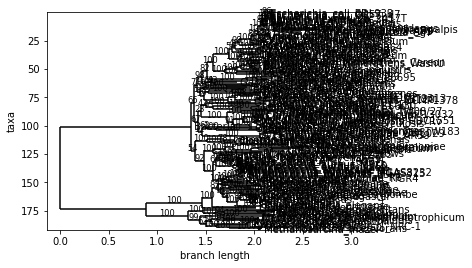

In [5]:
# 13. рисует дерево с помощью draw

Phylo.draw(tree1, do_show=False) 

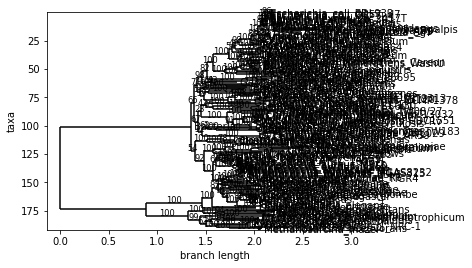

In [6]:
# 14. сохраняет изображение дерева в растровый формат (png) и векторный (svg/pdf)

Phylo.draw(tree1, do_show=False)
matplotlib.pyplot.savefig("py_tree1_phylo.svg")
matplotlib.pyplot.savefig("py_tree1_phylo.png")

<Figure size 1728x864 with 0 Axes>

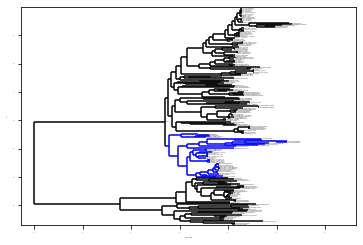

In [7]:
# 15. рисует дерево в более-менее читаемом виде

tree1 = tree1.as_phyloxml()
Phylo.write(tree1, "tree1.xml", "phyloxml")
tree1.clade[0, 1].color = "blue"
matplotlib.rc('font', size=1)
matplotlib.pyplot.figure(figsize=(24,12))
Phylo.draw(tree1, do_show = False)
matplotlib.pyplot.savefig("py_tree1_phylo_blue.png", dpi=600)

![title](py_tree1_phylo_blue.png)

#### Python. ETE (ETE3)

In [8]:
# 16. читает дерево
raw_tree = requests.get('https://www.jasondavies.com/tree-of-life/life.txt').text # читает дерево
tree2 = Tree(raw_tree, format=1)

In [9]:
# 17. рисует это дерево

tree2.render("py_tree2_ete3.pdf")
None

In [10]:
# 18. рисует это дерево в читаемом виде

circular_style = TreeStyle()
circular_style.mode = "c"
circular_style.scale = 20
tree2.render("py_tree2_ete3_circ.pdf", tree_style=circular_style)
None

![title](py_tree2_ete3_circ.svg)

In [11]:
# 19. вырезает (функция prune) из дерева случайный набор из 42 (можно другое число) листьев 

ss = random.sample(tree2.get_leaf_names(), 42)
tree2.prune(ss)

# 20. рисует обрезанное дерево

tree2.render("py_tree2_ete3_random.pdf")
None

![title](py_tree2_ete3_random.svg)

In [13]:
ts = TreeStyle()
ts.branch_vertical_margin = 15

In [14]:
nstyle = NodeStyle()
nstyle["shape"] = "square"
nstyle["size"] = 5 
nstyle["fgcolor"] = "lightblue"
for leaf in tree2.traverse(): 
    leaf.set_style(nstyle)

tree2.render("py_tree2_ete3_random_improved.png", tree_style=ts)
None

![title](py_tree2_ete3_random_improved.png)